
# Prepare Data

Plan - Acquire - **Prepare** - Explore - Model - Deliver

## What is the prep stage for? 

- Start with 1 or more dataframes that we have acquired
- summarize our data (head(), describe(), info(), isnull(), value_counts())
- visualize the distributions of the variables (we are NOT looking at relationships of variables, just individual variables and the values that make those up).  (plt.hist(), sns.boxplot(), value_counts())

- address missing values (sometimes we have to explore a little, to see how to address and then come back.)  (drop the rows, drop the columns, fill with 0, impute with mean, median, regression)
- address outliers (drop the rows/observations, pin them to the max-non-outlier value, bin values, keep them)
- data integrity issues, data errors (drop the rows/observations with the errors, correct them to what it was intended)
- address text normalization issues...e.g. deck 'C' 'c'. (correct and standardize the text)
- scale numeric data so that variables have the same weight, are on the same units (linear scalers and non-linear scalers)
- convert text/objects/characters data into data that can be represented numerically. (encoding, manual transformations using conditionals, e.g.,  dummy variables)
- tidy your data: getting your data in the shape it needs to be for modeling and exploring. every row should be an observation and every column should be a feature/attribute/variable. You want 1 observation per row, and 1 row per observation. If you want to predict a customer churn, each row should be a customer and each customer should be on only 1 row. 


Round 1 of a project, to get to an mvp: do the minimum you have to do. - null values in the simplest way that makes sense, dropping extreme outlier observations, scaling (depending on the algorithm). 

## Train, Validate, Test, oh my!

split our data into train, validate and test sample dataframes...why?  

overfitting: model is not generalizable. It fits the data you've trained it on "too well". 3 points does not necessarily mean a parabola.  

**train:** *in-sample*, explore, impute mean, scale numeric data (max() - min()...), fit our ml algorithms, test our models. 


> **algorithm:** the method that sklearn provides, such as decision_tree, knn, ..., y = mx+b  
> **model:** that algorithm specific to our data, e.g. regression: the model would contain the slope value and intercept value. y = .2x+5

**validate, test**: represents future, unseen data

**validate**: confirm our top models have not overfit, test our top n models on unseen data. Using validate performance results, we pick the top **1** model. 

**test**: *out-of-sample*, how we expect our top model to perform in production, on unseen data in the future. **ONLY USED ON 1 MODEL.**

Should I do *this* on the full dataset or on the train sample? 
*this*: the action, method, function, step you are about to take on your data.   
1. Are you comparing, looking at the relationship or summary stats or visualizations with 2+ variables?   
2. Are you using an sklearn method?   
3. Are you moving into the explore stage of the pipeline?   

If **ONE** or more of these is yes, then you should be doing it on your train sample.   
If **ALL** are no, then the entire dataset is fine.   

You want to do all the prep that can be done on the full dataset before you split.   
Go through, work on DF for all you need to, then move to train when it's time. So you don't have to go back and forth, because leads to errors and inconsistencies in data. 

## what's the outcome of this step?

- cleaned, prepared and sampled (train) data ready to explore.   
- a helper file prepare.py  

What should prepare.py contain? 
Anything that will need to be done to manipulate or transform your data. 
NOT plotting distribution, summarizing the data. 
taking of nulls, outliers, scaling, ...

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import acquire

1. acquire the data  
2. summarize the data  
3. distribution of variables  

In [41]:
df = acquire.get_titanic_data()

In [42]:
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 13 columns):
passenger_id    891 non-null int64
survived        891 non-null int64
pclass          891 non-null int64
sex             891 non-null object
age             714 non-null float64
sibsp           891 non-null int64
parch           891 non-null int64
fare            891 non-null float64
embarked        889 non-null object
class           891 non-null object
deck            203 non-null object
embark_town     889 non-null object
alone           891 non-null int64
dtypes: float64(2), int64(6), object(5)
memory usage: 97.5+ KB


In [44]:
df.isnull().sum()

passenger_id      0
survived          0
pclass            0
sex               0
age             177
sibsp             0
parch             0
fare              0
embarked          2
class             0
deck            688
embark_town       2
alone             0
dtype: int64

In [45]:
# to get percent missing
missing_vals = df.isnull().sum()/len(df)*100
print(missing_vals)

passenger_id     0.000000
survived         0.000000
pclass           0.000000
sex              0.000000
age             19.865320
sibsp            0.000000
parch            0.000000
fare             0.000000
embarked         0.224467
class            0.000000
deck            77.216611
embark_town      0.224467
alone            0.000000
dtype: float64


In [46]:
df.describe()

,passenger_id,survived,pclass,age,sibsp,parch,fare,alone
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,445.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.602694
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.489615
min,0.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,222.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,445.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,667.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,890.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [47]:
df.embark_town.value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [48]:
df.sex.value_counts()

male      577
female    314
Name: sex, dtype: int64

In [49]:
df['class'].value_counts()

Third     491
First     216
Second    184
Name: class, dtype: int64

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <a list of 10 Patch objects>)

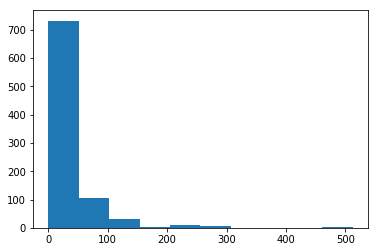

In [50]:
plt.hist(df.fare)

**Takeaways**

1. is pclass the same as class? if so, remove class (bc it's object, and pclass is already numeric)
2. is embarked the same as embark_town? if so, remove embarked, bc embark_town is more descriptive. 
3. remove deck because 77% are missing
4. Age: 19% missing values. not sure what to do yet with that. 
5. outlier of fare: let it be, drop that row, replace it with a non-outlier max value. for now, i'll leave it. 

In [51]:
# address pclass

pd.crosstab(df.pclass, df['class'])

# drop class

class,First,Second,Third
pclass,,,
1,216,0,0
2,0,184,0
3,0,0,491


In [52]:
# embarked vs embark_town
pd.crosstab(df.embarked, df.embark_town)

# drop embarked

embark_town,Cherbourg,Queenstown,Southampton
embarked,,,
C,168,0,0
Q,0,77,0
S,0,0,644


**Takeaways**

Drop class & embarked bc those are represented elsewhere. 

In [53]:
cols_to_drop = ['embarked', 'class', 'passenger_id']
df = df.drop(columns=cols_to_drop)
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'deck',
       'embark_town', 'alone'],
      dtype='object')

### Addressing NULLS

1. Age
2. Deck

In [55]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
deck           688
embark_town      2
alone            0
dtype: int64

Drop columns where > 50% of values are missing

In [56]:
type(missing_vals)

pandas.core.series.Series

In [57]:
# drop columns with >50% missing values

cols_to_drop = [missing_vals[missing_vals>50].index[0]]

df.drop(columns=cols_to_drop)

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,Southampton,0
1,1,1,female,38.0,1,0,71.2833,Cherbourg,0
2,1,3,female,26.0,0,0,7.9250,Southampton,1
3,1,1,female,35.0,1,0,53.1000,Southampton,0
4,0,3,male,35.0,0,0,8.0500,Southampton,1
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,Southampton,1
887,1,1,female,19.0,0,0,30.0000,Southampton,1
888,0,3,female,NaN,1,2,23.4500,Southampton,0
889,1,1,male,26.0,0,0,30.0000,Cherbourg,1


In [59]:
def drop_cols_with_50pct_null(df):
    # create series with percent missing
    missing_vals = df.isnull().sum()/len(df)*100
    # identify the columns to drop
    cols_to_drop = [missing_vals[missing_vals>50].index[0]]
    df = df.drop(columns=cols_to_drop)
    return df


In [60]:
drop_cols_with_50pct_null(df)

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,Southampton,0
1,1,1,female,38.0,1,0,71.2833,Cherbourg,0
2,1,3,female,26.0,0,0,7.9250,Southampton,1
3,1,1,female,35.0,1,0,53.1000,Southampton,0
4,0,3,male,35.0,0,0,8.0500,Southampton,1
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,Southampton,1
887,1,1,female,19.0,0,0,30.0000,Southampton,1
888,0,3,female,NaN,1,2,23.4500,Southampton,0
889,1,1,male,26.0,0,0,30.0000,Cherbourg,1


In [61]:
def drop_cols_with_xpct_null(df, max_pct_null=50):
    # create series with percent missing
    missing_vals = df.isnull().sum()/len(df)*100
    # identify the columns to drop
    if len(missing_vals[missing_vals>max_pct_null]) > 0:
        cols_to_drop = [missing_vals[missing_vals>max_pct_null].index[0]]
        return df.drop(columns=cols_to_drop)
    else:
        return df


In [64]:
df = drop_cols_with_xpct_null(df, max_pct_null=70)

In [65]:
# what happens if we set it to 80%?
# drop_cols_with_xpct_null(df, max_pct_null=80)
# max_pct_null=80
# len(missing_vals[missing_vals>max_pct_null])

In [66]:
# trouble shooting the error
#missing_vals[missing_vals>max_pct_null].index[0]
# it was calling the 1st item through index[0] that was causing the error bc the series was empty. 
# solution was if len(missing_vals[missing_vals>max_pct_null]) is 0
# max_pct_null=80

# if len(len(missing_vals[missing_vals>max_pct_null])) > 0:
#    return df.drop(columns=cols_to_drop)
# else:
#    return df

We could also remove observations if most of the variable/features are null for that observation. 

To drop observations with missing values:

In [71]:
# drop missing observations of embark town
df = df[~df.embark_town.isnull()]

**Takeaways**
1. Dropped deck
2. Age is missing a bunch...iteration 1: drop rows where age is missing so I could explore and see what other columns age is related to, that we could use to impute a more accurate value. 
3. Embark_town is missing 2 values. Let's drop those. 
4. convert objects/categorical vars to dummy vars. 

In [72]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embark_town      0
alone            0
dtype: int64

### Dummy Vars

convert categories to separate columns with a 0 or 1, boolean. 

- sex
- embark_town

In [73]:
df.embark_town.value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [74]:
df.sex.value_counts()

male      577
female    312
Name: sex, dtype: int64

In [78]:
df_dummies = pd.get_dummies(df[['sex', 'embark_town']], drop_first=[True, True])
df = pd.concat([df, df_dummies], axis=1)

In [79]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,3,male,22.0,1,0,7.2500,Southampton,0,1,0,1
1,1,1,female,38.0,1,0,71.2833,Cherbourg,0,0,0,0
2,1,3,female,26.0,0,0,7.9250,Southampton,1,0,0,1
3,1,1,female,35.0,1,0,53.1000,Southampton,0,0,0,1
4,0,3,male,35.0,0,0,8.0500,Southampton,1,1,0,1


In [80]:
df.age.mean()

29.64209269662921

### Train Validate Test Split

train ~50-80%
validate ~15-30%
test ~10-20%

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
train_validate, test = train_test_split(df, test_size=.2, 
                                        random_state=123, 
                                        stratify=df.survived)

train_validate.shape, test.shape

((711, 12), (178, 12))

In [89]:
train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=123, 
                                   stratify=train_validate.survived)
train.shape, validate.shape

((497, 12), (214, 12))

### Impute Mean Age

In [ ]:
test.age.mean()
train.age.mean()
validate.age.mean()